In [105]:
from temporal_walk import LinearRandomPicker, ExponentialRandomPicker, UniformRandomPicker

In [106]:
def test_pickers(picker, prioritize_end, hi, n_trials=1_000_000):
    counts = [0] * hi
    
    for _ in range(n_trials):
        picked_num = picker.pick_random(0, hi, prioritize_end)
        counts[picked_num] += 1
    
    return counts

In [107]:
import matplotlib.pyplot as plt

def plot_number_picked(counts):
    plt.plot(counts)
    
    plt.xlabel('Number')
    plt.ylabel('Times Picked')
    
    plt.show()

In [108]:
counts_linear_end_prioritized = test_pickers(LinearRandomPicker(), True, hi=100)

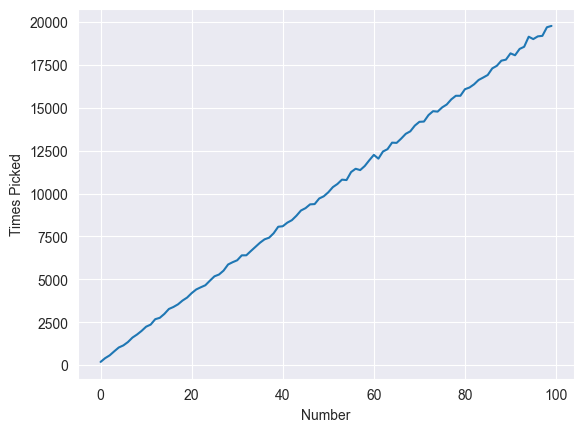

In [109]:
plot_number_picked(counts_linear_end_prioritized)

In [110]:
counts_linear_start_prioritized = test_pickers(LinearRandomPicker(), False, hi=100)

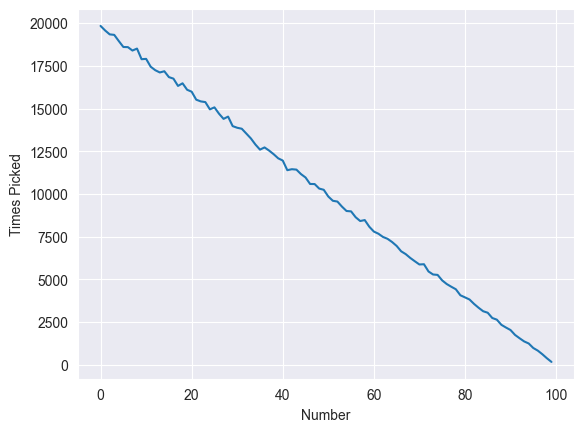

In [111]:
plot_number_picked(counts_linear_start_prioritized)

In [112]:
import numpy as np

class PyExponentialRandomPicker:
    def __init__(self, decay_rate=1.0):
        self.decay_rate = decay_rate

    def pick_random(self, start, end, prioritize_end=True):
        if start >= end:
            raise ValueError("Start must be less than end.")
        
        length = end - start
        indices = np.arange(length)
    
        if prioritize_end:
            weights = np.exp(self.decay_rate * indices)
        else:
            weights = np.exp(-self.decay_rate * indices)
    
        probabilities = weights / weights.sum()
        random_index = np.random.choice(indices, p=probabilities)
    
        return start + random_index

In [113]:
counts_exp_end_prioritized = test_pickers(ExponentialRandomPicker(), True, hi=100)

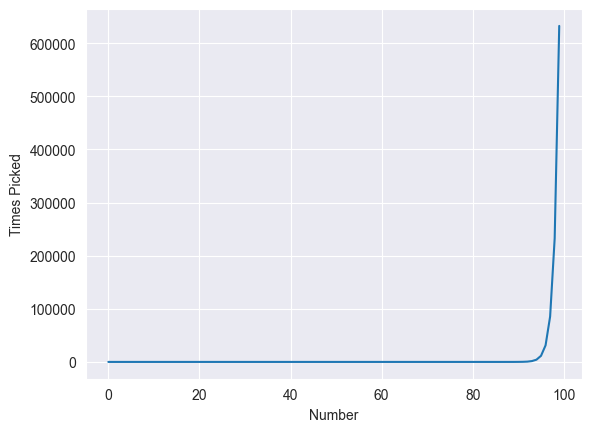

In [114]:
plot_number_picked(counts_exp_end_prioritized)

In [115]:
counts_exp_py_end_prioritized = test_pickers(PyExponentialRandomPicker(), True, hi=100)

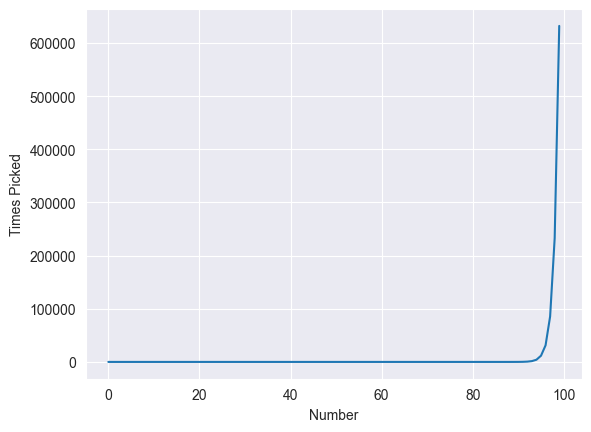

In [116]:
plot_number_picked(counts_exp_py_end_prioritized)

In [117]:
counts_exp_start_prioritized = test_pickers(ExponentialRandomPicker(), False, hi=100)

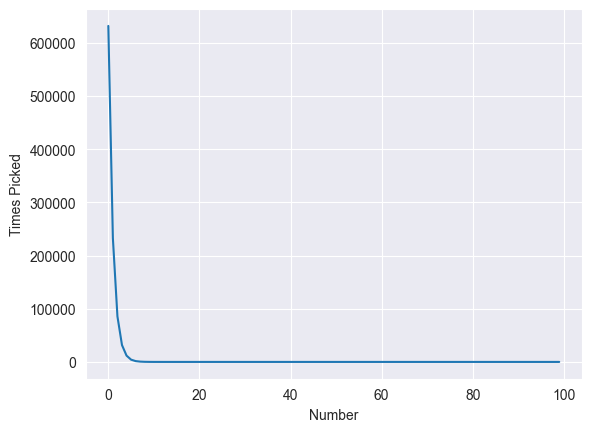

In [118]:
plot_number_picked(counts_exp_start_prioritized)

In [119]:
counts_exp_py_start_prioritized = test_pickers(PyExponentialRandomPicker(), False, hi=100)

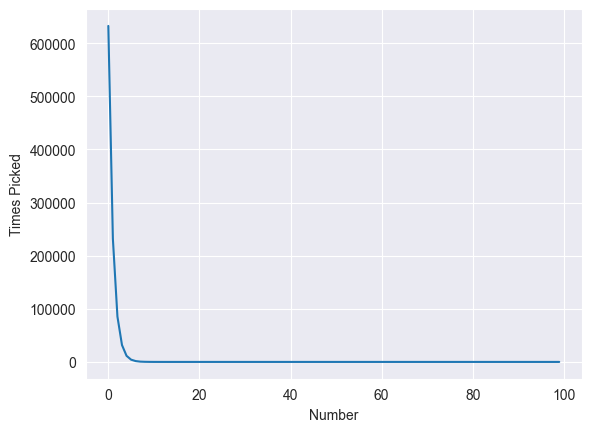

In [120]:
plot_number_picked(counts_exp_py_start_prioritized)

In [121]:
counts_uniform_end_prioritized = test_pickers(UniformRandomPicker(), True, hi=100)

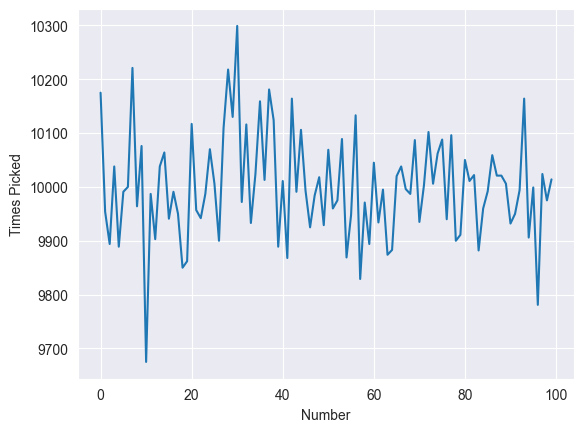

In [122]:
plot_number_picked(counts_uniform_end_prioritized)

In [123]:
counts_uniform_start_prioritized = test_pickers(UniformRandomPicker(), False, hi=100)

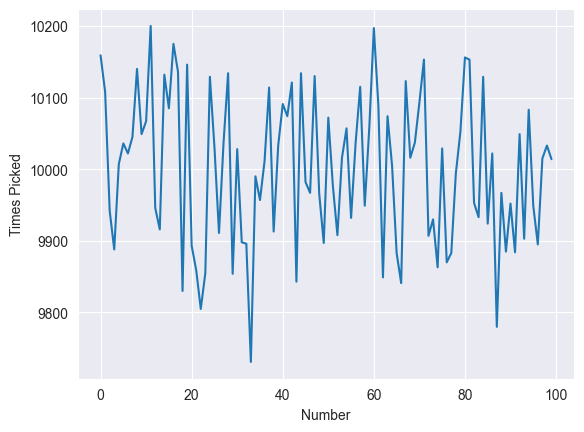

In [124]:
plot_number_picked(counts_uniform_start_prioritized)